Another approach to searching for weights is to use a hill-climbing algorithm. Again, randomize the initial weights. On every episide, we add a little noise to the weights, keeping the new weights if the agent's score improves. 

Import modules

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from gym import wrappers

Define a simple function that runs a single episode and takes an action based on the dot product of four weights and four observations. This function needs the concept of a reward (points) that increment each time an action occurs. In other words, the longer the cartpole stays on the track, the more points we get.

In [4]:
def run_episode(env, weights):
    
    observation = env.reset()
    total_reward = 0
    
    for _ in range(200):
        action = 0 if np.matmul(weights, observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        total_reward += reward
        
        if done:
            break
    
    return total_reward

We'll also define a function that searches for the best weights by running many training episodes. This function iteratively changes four weights (one weight per observation) using a hill-climbing algorithm. The function tracks the highest reward until reward reaches 200 points. It also tracks the number of training episodes required to reach 200 points (i.e., how many weight guesses are needed to derive the best weights).

In [40]:
def get_best_weights(submit):
    # set submit to False if training to get best weights, set to True if running episodes with best weights found 
    
    env = gym.make('CartPole-v0')
    
    if submit:
        # log data
        env = gym.wrappers.Monitor(env, 'cartpole-experiments/', force=True)

    counter = 0
    noise_scaling = 0.2 # try changing this value for different results
    weights = np.random.rand(4) * 2 - 1
    best_reward = 0
    
    for _ in range(2000):
        counter += 1
        new_weights = weights + (np.random.rand(4) * 2 - 1) * noise_scaling
        reward = run_episode(env, new_weights)
        
        if reward > best_reward:
            best_reward = reward
            weights = new_weights
            
            if reward == 200:
                break
    
    if submit:
        # run episodes with the best weights
        for _ in range(100):
            run_episode(env, weights)
        
        env.monitor.close()
                
    return counter

Test the get_best_weights function to make sure it works.

In [38]:
best_weights_test = get_best_weights(submit=False)

print(best_weights_test)

[2017-04-14 16:05:36,834] Making new env: CartPole-v0


228


The function successfully returns the counter for how many weight guesses it took to reach 200 points. Run the function multiple times to verify that the counter changes, since the initial weight guesses are stochastic.

With these two functions, we can now analyze the distribution of guesses required to find the best weights.

[2017-04-14 16:05:41,632] Making new env: CartPole-v0
[2017-04-14 16:05:41,642] Making new env: CartPole-v0
[2017-04-14 16:05:41,854] Making new env: CartPole-v0
[2017-04-14 16:05:41,863] Making new env: CartPole-v0
[2017-04-14 16:05:42,070] Making new env: CartPole-v0
[2017-04-14 16:05:43,694] Making new env: CartPole-v0
[2017-04-14 16:05:44,658] Making new env: CartPole-v0
[2017-04-14 16:05:44,854] Making new env: CartPole-v0
[2017-04-14 16:05:45,434] Making new env: CartPole-v0
[2017-04-14 16:05:45,909] Making new env: CartPole-v0
[2017-04-14 16:05:46,528] Making new env: CartPole-v0
[2017-04-14 16:05:46,540] Making new env: CartPole-v0
[2017-04-14 16:05:46,907] Making new env: CartPole-v0
[2017-04-14 16:05:47,102] Making new env: CartPole-v0
[2017-04-14 16:05:47,307] Making new env: CartPole-v0
[2017-04-14 16:05:47,318] Making new env: CartPole-v0
[2017-04-14 16:05:47,523] Making new env: CartPole-v0
[2017-04-14 16:05:48,546] Making new env: CartPole-v0
[2017-04-14 16:05:48,734] Ma

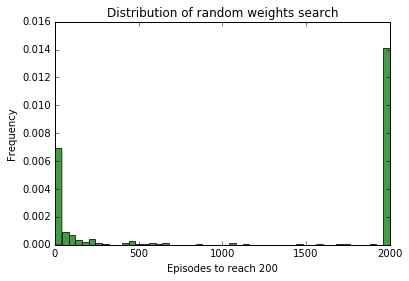

Average number of weight guesses to get 200 points: 1184.546


In [39]:
# store the counts of guesses in a list
counter_results = []

# run the get_best_weights function 500 times
for _ in range(500):
    counter_results.append(get_best_weights(submit=False))
    
# plot frequency of episodes required to reach reward of 200 
plt.hist(counter_results, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes to reach 200')
plt.ylabel('Frequency')
plt.title('Distribution of random weights search')
plt.show()

# print the average number of episodes required to reach reward of 200
print('Average number of weight guesses to get 200 points: %s' % str(np.sum(counter_results) / 500.0))

About half the trials were unable to improve the weights to reach 200 points (the bar on the right). Hill-climbing is sensitive to the initial random weight guesses. In many cases, the initial weights are set to values where the score doesn't improve when we "climb" to new values. The algorithm is locally stuck. 

Let's try increasing the noise_scaling value to 0.2 in the get_best_weights function to see whether results improve. 

[2017-04-14 16:08:23,679] Making new env: CartPole-v0
[2017-04-14 16:08:23,689] Making new env: CartPole-v0
[2017-04-14 16:08:23,700] Making new env: CartPole-v0
[2017-04-14 16:08:23,907] Making new env: CartPole-v0
[2017-04-14 16:08:23,915] Making new env: CartPole-v0
[2017-04-14 16:08:24,121] Making new env: CartPole-v0
[2017-04-14 16:08:24,228] Making new env: CartPole-v0
[2017-04-14 16:08:24,372] Making new env: CartPole-v0
[2017-04-14 16:08:24,440] Making new env: CartPole-v0
[2017-04-14 16:08:24,651] Making new env: CartPole-v0
[2017-04-14 16:08:24,874] Making new env: CartPole-v0
[2017-04-14 16:08:25,074] Making new env: CartPole-v0
[2017-04-14 16:08:25,209] Making new env: CartPole-v0
[2017-04-14 16:08:25,425] Making new env: CartPole-v0
[2017-04-14 16:08:26,102] Making new env: CartPole-v0
[2017-04-14 16:08:26,300] Making new env: CartPole-v0
[2017-04-14 16:08:26,491] Making new env: CartPole-v0
[2017-04-14 16:08:26,682] Making new env: CartPole-v0
[2017-04-14 16:08:26,884] Ma

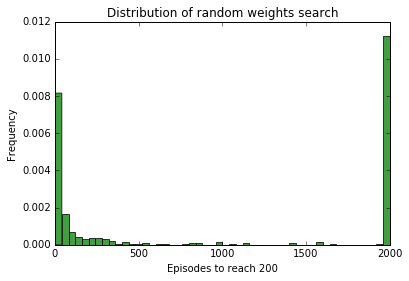

Average number of weight guesses to get 200 points: 976.768


In [41]:
# store the counts of guesses in a list
counter_results = []

# run the get_best_weights function 500 times
for _ in range(500):
    counter_results.append(get_best_weights(submit=False))
    
# plot frequency of episodes required to reach reward of 200 
plt.hist(counter_results, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes to reach 200')
plt.ylabel('Frequency')
plt.title('Distribution of random weights search')
plt.show()

# print the average number of episodes required to reach reward of 200
print('Average number of weight guesses to get 200 points: %s' % str(np.sum(counter_results) / 500.0))

The results are a bit better with the higher noise_scaling value.

We can also smooth out the variance of rewards by adding up the total reward across a batch of episode runs with a given weight input. This should provide a better measurement of whether specific weights performs better than the previous weights.  

To do this, we can make a small change to the get_best_weights function.

In [11]:
def get_best_weights(submit):
    # set submit to False if training to get best weights, set to True if running episodes with best weights found 
    
    env = gym.make('CartPole-v0')
    
    if submit:
        # log data
        env = gym.wrappers.Monitor(env, 'cartpole-experiments/', force=True)

    counter = 0
    noise_scaling = 0.1 # try changing this value for different results
    weights = np.random.rand(4) * 2 - 1
    best_reward = 0
    episode_batch = 5
    
    for _ in range(2000):
        counter += 1
        new_weights = weights + (np.random.rand(4) * 2 - 1) * noise_scaling
        # reward = run_episode(env, new_weights)
        
        # instead, calculate the reward for the entire batch of five episodes
        reward = 0
        for _ in range(episode_batch):
            run = run_episode(env, new_weights)
            reward += run 
        
        if reward > best_reward:
            best_reward = reward
            weights = new_weights
            
            if reward == 200:
                break
    
    if submit:
        # run episodes with the best weights
        for _ in range(100):
            run_episode(env, weights)
        
        env.monitor.close()
                
    return counter

Another useful metric is how many episodes it takes on average if the hill-climbing algorithm does reach 200 points. We can see how the hill-climbing stats differ from random weight guesses.

[2017-04-14 16:10:52,476] Making new env: CartPole-v0
[2017-04-14 16:10:52,494] Making new env: CartPole-v0
[2017-04-14 16:10:52,695] Making new env: CartPole-v0
[2017-04-14 16:10:52,704] Making new env: CartPole-v0
[2017-04-14 16:10:52,914] Making new env: CartPole-v0
[2017-04-14 16:10:53,012] Making new env: CartPole-v0
[2017-04-14 16:10:53,232] Making new env: CartPole-v0
[2017-04-14 16:10:53,447] Making new env: CartPole-v0
[2017-04-14 16:10:53,457] Making new env: CartPole-v0
[2017-04-14 16:10:53,469] Making new env: CartPole-v0
[2017-04-14 16:10:53,550] Making new env: CartPole-v0
[2017-04-14 16:10:53,559] Making new env: CartPole-v0
[2017-04-14 16:10:53,569] Making new env: CartPole-v0
[2017-04-14 16:10:53,791] Making new env: CartPole-v0
[2017-04-14 16:10:53,822] Making new env: CartPole-v0
[2017-04-14 16:10:53,847] Making new env: CartPole-v0
[2017-04-14 16:10:54,055] Making new env: CartPole-v0
[2017-04-14 16:10:55,200] Making new env: CartPole-v0
[2017-04-14 16:10:55,413] Ma

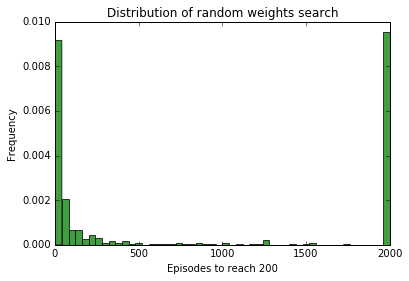

Median number of weight guesses to get 200 points: 21.000
Average number of weight guesses to get 200 points: 144.123
Standard deviation of weight guesses to get 200 points: 306.459
Coefficient of variation of weight guesses to get 200 points: 2.126


In [42]:
# store the counts of guesses in a list
counter_results = []

# run the get_best_weights function 500 times
for _ in range(500):
        counter_results.append(get_best_weights(submit=False))
    
# plot frequency of episodes required to reach reward of 200 
plt.hist(counter_results, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes to reach 200')
plt.ylabel('Frequency')
plt.title('Distribution of random weights search')
plt.show()

# print the average number of episodes required to reach reward of 200 (excluding cases where 200 points not achieved)
counter_results_np = np.array(counter_results)
counter_results_achieved = counter_results_np[counter_results_np < 2000]

print('Median number of weight guesses to get 200 points: %.3f' % np.median(counter_results_achieved))
print('Average number of weight guesses to get 200 points: %.3f' % np.mean(counter_results_achieved))
print('Standard deviation of weight guesses to get 200 points: %.3f' % np.std(counter_results_achieved))
print('Coefficient of variation of weight guesses to get 200 points: %.3f' % (np.std(counter_results_achieved) / np.mean(counter_results_achieved)))

For this example, random search does performs somewhat better than hill-climb, with less variability. We'd need to tune the noise parameter, smooth out reward variance, and constrain the range of initial weights to get better results.